In [13]:
# Libraries

import random

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
# Logistic Regression Implementation

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            # Linear model Predictions
            linear_model_output = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model_output)

            # Compute the gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update the weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model_output)
        # Convert probabilities to binary output
        return np.where(y_predicted >= 0.5, 1, 0)

In [19]:
# Evaluation Metric 

def f2_score(y_true, y_pred):
    # Calculate True Positives, False Positives, and False Negatives
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    # Calculate Precision and Recall
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Calculate F2 Score
    f2 = (5 * precision * recall) / (4 * precision + recall) if (4 * precision + recall) > 0 else 0

    return f2

In [65]:
# Output Visualization Function

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a contour plot for the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='RdYlBu')

    # Plot the data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', label='Class 1')
    
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [51]:
# Synthetic Data Function

def generate_synthetic_data(num_samples=1000, mean1=(0, 0), std1=1, mean2=(2, 2), std2=1, noise_std=0.4):
    """
    Generate synthetic binary classification data with noise.

    Parameters:
    - num_samples: Total number of samples to generate.
    - mean1: Mean of the first class.
    - std1: Standard deviation of the first class.
    - mean2: Mean of the second class.
    - std2: Standard deviation of the second class.
    - noise_std: Standard deviation of the noise to be added to the data points.

    Returns:
    - X: Generated data points with noise.
    - y: Labels (0 or 1) corresponding to the classes.
    """
    # Half the samples for each class
    samples_per_class = num_samples // 2
    
    # Generate samples for class 0
    class_0 = np.random.normal(loc=mean1, scale=std1, size=(samples_per_class, 2))
    # Generate noise for class 0
    noise_0 = np.random.normal(loc=0, scale=noise_std, size=class_0.shape)
    class_0 += noise_0
    
    # Generate samples for class 1
    class_1 = np.random.normal(loc=mean2, scale=std2, size=(samples_per_class, 2))
    # Generate noise for class 1
    noise_1 = np.random.normal(loc=0, scale=noise_std, size=class_1.shape)
    class_1 += noise_1
    
    # Combine the classes
    X = np.vstack((class_0, class_1))
    y = np.array([0] * samples_per_class + [1] * samples_per_class)
    
    return X, y

In [52]:
# Synthetic Data Generation

X, y = generate_synthetic_data(num_samples=1000, mean1=(0, 0), std1=0.5, mean2=(2, 2), std2=0.5)

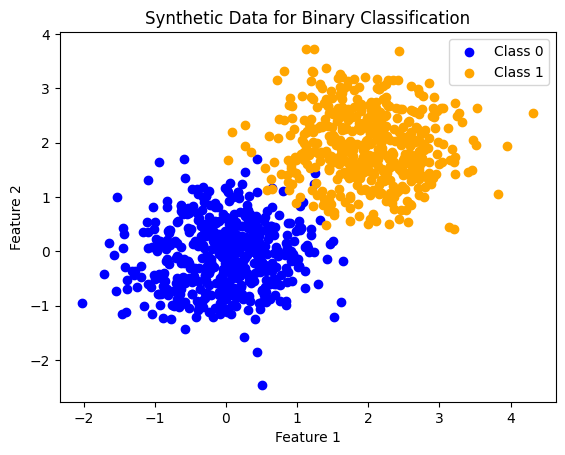

In [53]:
# Visualizing the generated data

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', label='Class 1')
plt.title('Synthetic Data for Binary Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [54]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# logistic regression model training

model = LogisticRegression(learning_rate=0.1, num_iterations=100)
model.fit(X_train, y_train)

In [67]:
# Make predictions

y_pred = model.predict(X_test)

In [68]:
# Evaluation

y_pred = model.predict(X_test)
f2 = f2_score(y_test, y_pred)

print(f"F2 Score: {f2:.2f}")

F2 Score: 0.98


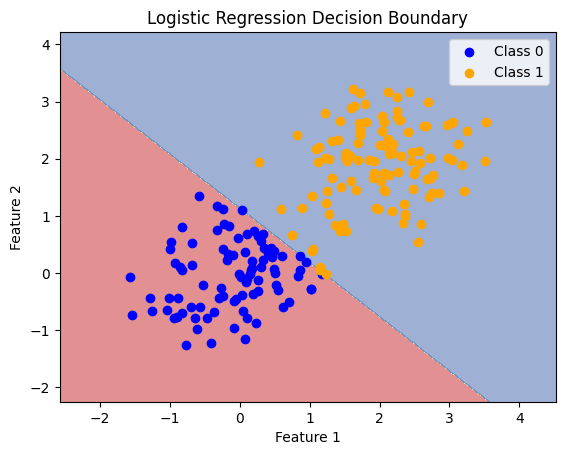

In [69]:
# Plot the decision boundary
plot_decision_boundary(model, X_test, y_pred)